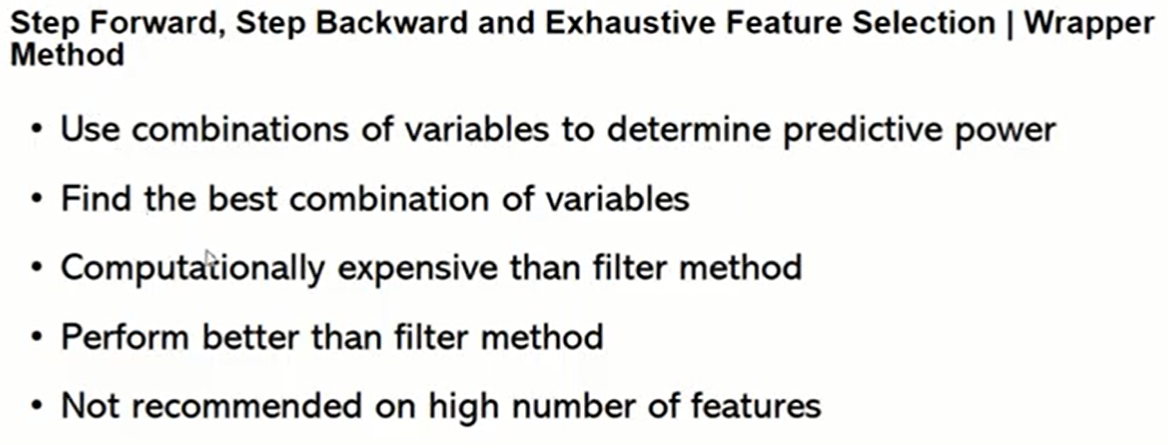

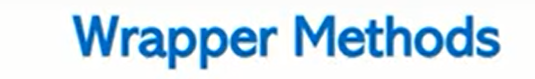

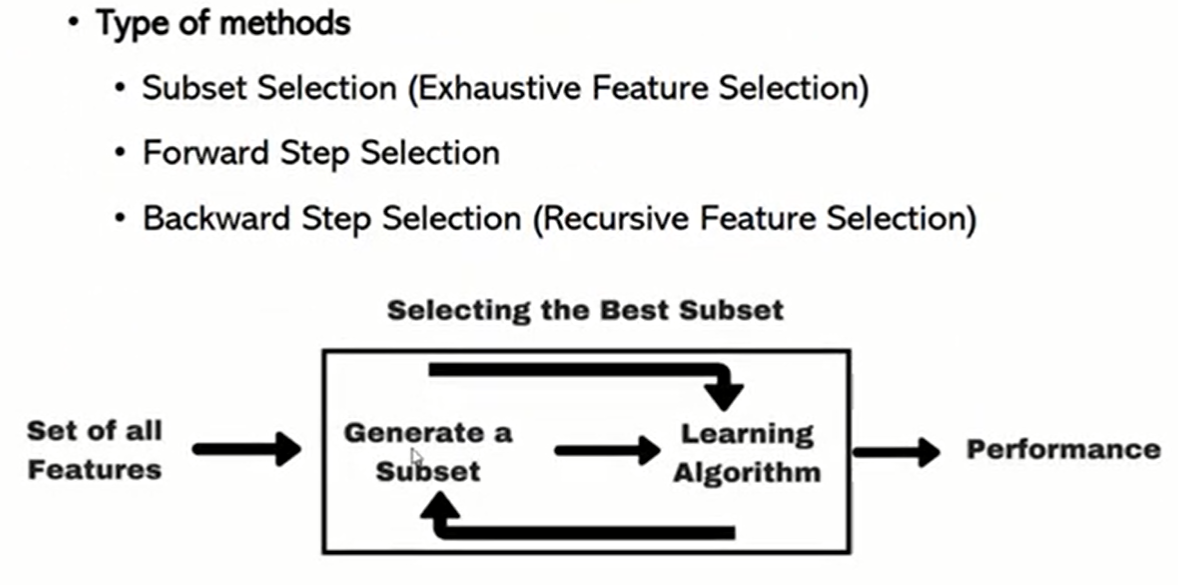

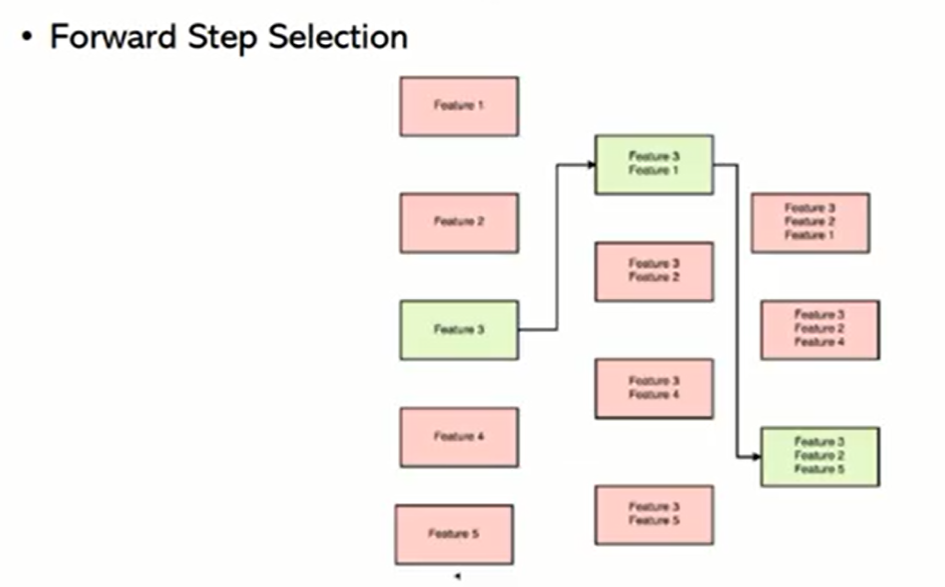

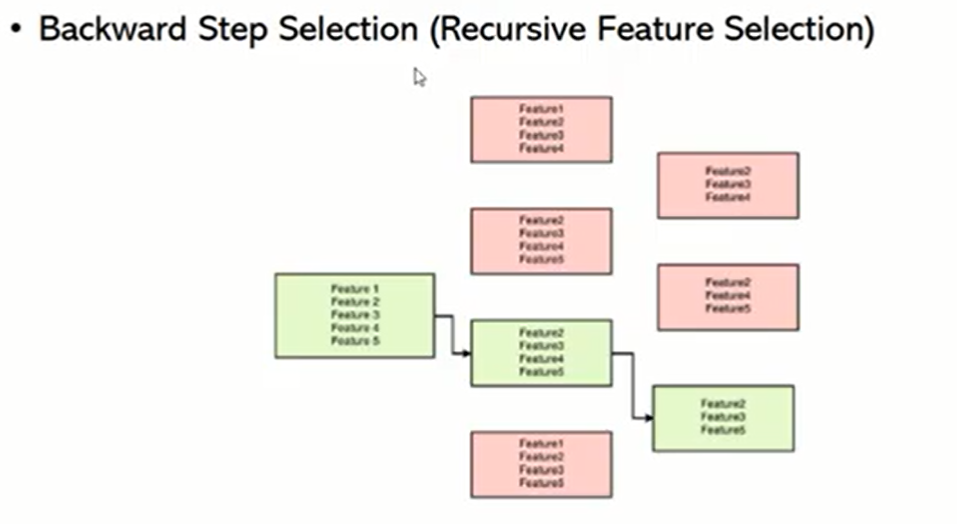

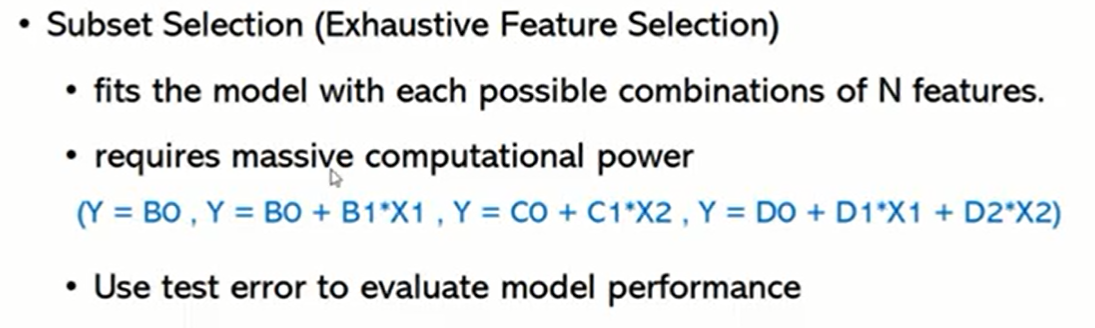

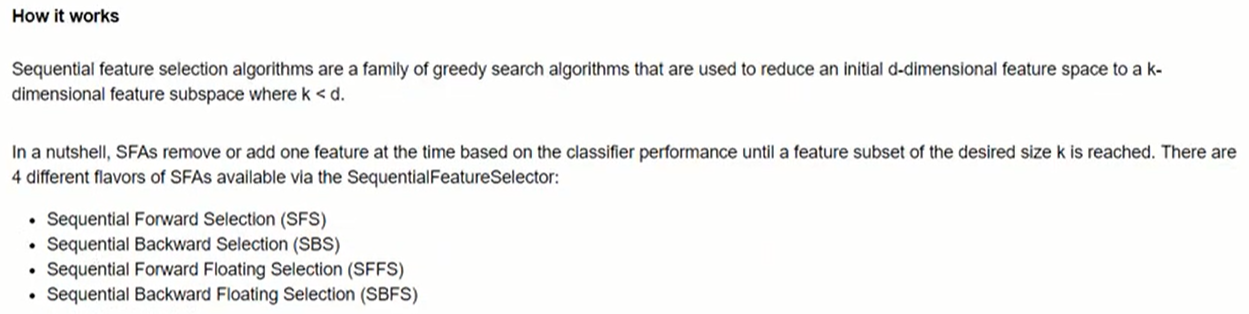

In [1]:
# Install mlxtend library
!pip install mlxtend

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [2]:
# Import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.datasets import load_wine

In [6]:
data = load_wine()

In [7]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [9]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [11]:
X = pd.DataFrame(data.data)
y = data.target

In [15]:
X.columns = data.feature_names
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [16]:
X.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [18]:
# To avoid overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((142, 13), (36, 13))

### 1. Step Forward feature selection

In [25]:
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
sfs = SFS(clf,
          n_features_to_select='auto',
          tol=None,
          direction='forward',
          scoring='accuracy',
          cv=5,
          n_jobs=None,)
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=RandomForestClassifier(n_jobs=-1,
                                                           random_state=0),
                          n_features_to_select=5, scoring='accuracy')

In [41]:
# Set of features will give maximum result if selected
sfs.get_feature_names_out()

array(['alcohol', 'magnesium', 'flavanoids', 'proanthocyanins',
       'color_intensity', 'hue'], dtype=object)

### 2. Step Backward feature Selection

In [44]:
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
sfs = SFS(clf,
          n_features_to_select='auto',
          tol=None,
          direction='backward',
          scoring='accuracy',
          cv=5,
          n_jobs=None,)
sfs.fit(X_train, y_train)

SequentialFeatureSelector(direction='backward',
                          estimator=RandomForestClassifier(n_jobs=-1,
                                                           random_state=0),
                          n_features_to_select='auto', scoring='accuracy')

In [45]:
# Set of features will give maximum result if selected
sfs.get_feature_names_out()

array(['alcohol', 'magnesium', 'total_phenols', 'proanthocyanins',
       'color_intensity', 'hue', 'od280/od315_of_diluted_wines'],
      dtype=object)

### 3. Exhaustive feature selection
-> Very time consuming and complex

In [47]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [48]:
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
efs = EFS(clf,
          min_features=4,
          max_features=5,
          print_progress=True,
          scoring='accuracy',
          cv=None,
          n_jobs=1)
efs.fit(X_train, y_train)

Features: 2002/2002

ExhaustiveFeatureSelector(cv=None,
                          estimator=RandomForestClassifier(n_jobs=-1,
                                                           random_state=0),
                          max_features=5, min_features=4)

In [50]:
# Set of features will give maximum result if selected
efs.best_feature_names_

('alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash')

In [51]:
efs.best_idx_

(0, 1, 2, 3)

In [52]:
efs.best_score_

1.0

In [53]:
# Plot the features
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

C:\Users\dell\anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\dell\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Number of Features', ylabel='Performance'>)

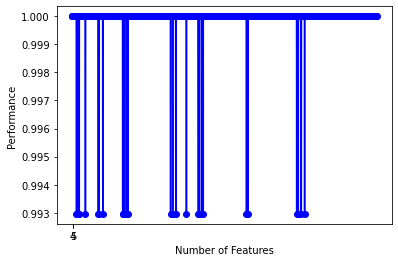

In [54]:
plot_sfs(efs.get_metric_dict(), kind='std_dev')